Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE" and remove every line containing the expression: "raise ..." (if you leave such a line your code will not run).

Do not remove any cell from the notebook you downloaded. You can add any number of cells (and remove them if not more necessary).

Do not leave any variable initialized to None.

## IMPORTANT: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebook!!!

## Make sure to name your notebook file (.ipynb) correctly:
### - HW3_NL_NAMESURNAME_ID (E.g. : HW3_NL_MARIOROSSI_2204567)

## Fill in your name, surname and id number (numero matricola) below:

In [1]:
NAME = "NIHAL SURI"
ID_number = int("2141819")

import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

---

## HOMEWORK #3

### Non linear models for classification 

In this notebook we are going to explore the use of SVM and Neural Networks for image classification. We are going to use the famous MNIST dataset, that is a dataset of handwritten digits. We get the data from mldata.org, that is a public repository for machine learning data.

In [2]:
# Load the required packages
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

np.random.seed(ID_number)

In [3]:
#load the MNIST dataset 
#Load data from https://www.openml.org/d/554
X,Y = fetch_openml('mnist_784', version=1, return_X_y=True,as_frame = False)

print(f'Each image is represented as vector of shape {X[0].shape}')
print(f'The image is represented in gray scale levels {X[0]}')
print(f'Here it is a label: {Y[0]}')

Each image is represented as vector of shape (784,)
The image is represented in gray scale levels [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.

In [4]:
# Let's normalize the features so that each value is between [0,1]
# Rescale the data
X = X / 255.

In a classification problem it is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.
We can achieve this by setting the “stratify” argument of the function "train_test_split" to the Y component of our dataset.

We are going to use 500 samples in the train dataset, the remaining ones are used for testing.

In [5]:
from sklearn.model_selection import train_test_split

m_t = 500
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=m_t/len(Y), random_state=ID_number, stratify=Y)

print(f'Length train dataset: {len(y_train)}, Labels and frequencies: \n {list(zip(*np.unique(y_train, return_counts=True)))}')
print(f'Length test dataset: {len(y_test)}, Labels and frequencies: \n {list(zip(*np.unique(y_test, return_counts=True)))}')

Length train dataset: 500, Labels and frequencies: 
 [('0', 49), ('1', 56), ('2', 50), ('3', 51), ('4', 49), ('5', 45), ('6', 49), ('7', 52), ('8', 49), ('9', 50)]
Length test dataset: 69500, Labels and frequencies: 
 [('0', 6854), ('1', 7821), ('2', 6940), ('3', 7090), ('4', 6775), ('5', 6268), ('6', 6827), ('7', 7241), ('8', 6776), ('9', 6908)]


In [6]:
# Function to plot a digit and print the corresponding label
def plot_digit(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28, 28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print(f"LABEL: {labels[index]}")
    return

INPUT:


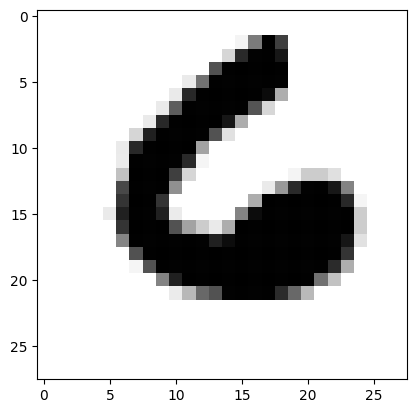

LABEL: 6
INPUT:


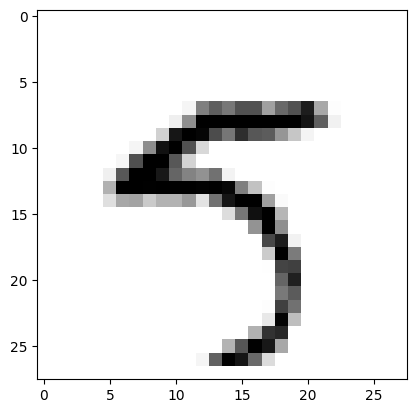

LABEL: 5


In [7]:
#let's try the plotting function
plot_digit(x_train, y_train, 100)
plot_digit(x_test, y_test, 40000)

## TO DO 1
SVM with cross validation to pick the best model. Use SVC from sklearn.svm and GridSearchCV from sklearn.model_selection (5-fold cross-validation).

Print the best parameters found as well as the best score obtained by the 'optimal' model.
Choose the grid, depending on the kernel you are using different hyper-parameters are needed (C, gamma, ...). 
You do not need to use more than 5 values for each hyper-parameter (otherwise the cell could be very slow). 

In [8]:
# import SVC
from sklearn.svm import SVC
# import for Cross-Validation
from sklearn.model_selection import GridSearchCV


def compute_best_SVM_with_CV(kernel_type : str, parameters : dict, x_train : np.ndarray, y_train : np.ndarray) -> tuple:
    '''
    Use Cross validation to find the best SVM on the given parameters. Return the best parameters set together with 
    the corresponding score. Return also the scores for all the other parameters given as input.
    :param kernel_type: Type of kernel (i.e. linear, rbf, poly)
    :param parameters: Dict containing kernel parameters (e.g. {'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001], ...})
    :param x_train: Train dataset
    :param y_train: Train labels
    
    :returns: (best_param, best_score, all_scores)
        WHERE:
        best_param: best parameter set (this is a dictionary)
        best_score: best score obtained for the given parameters (float)
        all_scores: all scores computed for each parameter (np.ndarray)
    '''
    SVM_model = SVC(kernel=kernel_type)
    # Use GridSearchCV to find the best parameter set.
    # YOUR CODE HERE
    clf = GridSearchCV(SVM_model, parameters)
    clf.fit(x_train, y_train)

    print('#####################################')
    print(f'RESULTS for {kernel_type} KERNEL\n')
    # Store the best parameters set and print them
    print("Best parameters set found:")
    best_param = clf.best_params_
    # YOUR CODE HERE
    print(best_param)
    
    # Store and print the score of the best parameters set
    print("\nScore with best parameters:")
    best_score = clf.best_score_
    # YOUR CODE HERE
    print(best_score)
    
    # Store and print all the scores for the given parameters (average of the validation scores)
    print("\nAll scores on the grid:")
    all_scores = clf.cv_results_
    # YOUR CODE HERE
    # add code here to the take the mean of the parameters
    print(all_scores)
    
    return best_param, best_score, all_scores

# Choose the grid for parameters of the linear SVM kernel
linear_parameters = {
    'C': [0.1, 1, 10, 100, 1000]
}
# YOUR CODE HERE

best_param_lin, best_score_lin, all_scores_lin = compute_best_SVM_with_CV('linear', linear_parameters, x_train, y_train)
# Choose the grid for parameters of the rbf SVM kernel
rbf_parameters = {
    'C': [0.1, 1, 10, 100, 1000] , 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}
# YOUR CODE HERE

best_param_rbf, best_score_rbf, all_scores_rbf = compute_best_SVM_with_CV('rbf', rbf_parameters, x_train, y_train)
# Choose the grid for parameters of the poly SVM kernel (do not forget to choose the degree)
poly_parameters = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'degree': [2, 3, 4, 5]
}
# YOUR CODE HERE

best_param_poly, best_score_poly, all_scores_poly = compute_best_SVM_with_CV('poly', poly_parameters, x_train, y_train)

NotImplementedError: 

In [ ]:
assert type(best_param_rbf) == dict
assert type(best_score_rbf) == np.float64
assert np.prod(np.array([len(params) for params in rbf_parameters.values()])) == len(all_scores_rbf)


In [ ]:
# TODO 2: 
# Get training and test error for the best SVM model obtained from CV (you need to choose across different kernels 
# too). You just need to look at the best model for each kernel and choose the best one (you can do this by hand).

best_kernel_type, best_parameters = None, None
# YOUR CODE HERE
raise NotImplementedError() # Remove this line
best_SVM = SVC(kernel=best_kernel_type, **best_parameters)
best_SVM.fit(x_train, y_train)

# Compute training and test error for this model (use the usual sklearn built-in functions)
training_error, test_error = None, None
# YOUR CODE HERE
raise NotImplementedError() # Remove this line

print (f"Best SVM training error: {training_error}")
print (f"Best SVM test error: {test_error}")

In [ ]:
assert type(training_error) == np.float64 or float
assert type(test_error) == np.float64 or float


### TO DO 3
Now we use feed-forward neural networks for classification. 
In particular, we use the Multi-Layer-Perceptron (the multi-layer structure we have seen in class, see http://scikit-learn.org/stable/modules/neural_networks_supervised.html).

Similarly as before, we use cross validation (5-fold cross-validation) to pick the best model, you need to complete the function 'compute_best_MLP_with_CV()' that finds the best MLP architecture given a specific activation function.

Note that the starting random state is fixed to make the runs reproducible (random_state=ID_number).
The following options for the MLP are used: max_iter=1000, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID_number, learning_rate_init=.1, activation = activation_f. 

In [ ]:
def compute_best_MLP_with_CV(activation_f : str, parameters : dict, x_train : np.ndarray, y_train : np.ndarray) -> tuple:
    '''
    Use Cross validation to find the best MLP architecture given a specific activation function. 
    Return the best parameters set together with the corresponding score. Return also the scores for all the other parameters given as input.
    :param activation_f: Type of activation function (e.g. 'logistic', 'tanh', 'relu')
    :param parameters: architectures (e.g. {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]})
    :param x_train: Train dataset
    :param y_train: Train labels
    
    :returns: (best_param, best_score, all_scores)
        WHERE:
        best_param: best parameter set (this is a dictionary)
        best_score: best score obtained for the given parameters (float)
        all_scores: all scores computed for each parameter (np.ndarray)
    '''
    
    
    mlp = MLPClassifier(max_iter=1000, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID_number, learning_rate_init=.1,activation = activation_f)
    
    #Use GridSearchCV to find the various paramters the function returns: best_param, best_score, all_scores
    
    # YOUR CODE HERE
    raise NotImplementedError() # Remove this line
    return best_param, best_score, all_scores

In [ ]:
# test various architectures (hidden_layer_sizes) and activation functions (e.g. 'logistic','tanh','relu') for the MLP.

mlp_parameters = None # leave here maximum 3 architectures when you submit

# next test different architectures and activation functions: use compute_best_MLP_with_CV()
# YOUR CODE HERE
raise NotImplementedError() # Remove this line

In [ ]:
# simple autotest with relu
best_param_relu, best_score_relu, all_scores_relu = compute_best_MLP_with_CV('relu', mlp_parameters, x_train, y_train)

assert type(best_param_relu) == dict
assert type(best_score_relu) == np.float64 or float
assert np.prod(np.array([len(params) for params in mlp_parameters.values()])) == len(all_scores_relu)


In [ ]:
#Select the best activation function and architecture you found so that it can be used next

best_activation_type, mlp_best_param = None, None
# YOUR CODE HERE
raise NotImplementedError() # Remove this line

## TO DO 4


Now get training and test error for the NN with the best parameters from above. We use verbose=True
in input so to see how loss changes in iterations (see how this changes if the number of iterations is changed)

In [ ]:
# Get training and test error for the best NN model found using CV
max_iter = 1000
mlp = MLPClassifier(**mlp_best_param, max_iter=max_iter, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID_number,
                    learning_rate_init=.1,activation=best_activation_type, verbose=True)

# ADD CODE: FIT MODEL & COMPUTE TRAINING AND TEST ERRORS
training_error, test_error = None, None
# YOUR CODE HERE
raise NotImplementedError() # Remove this line

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

plt.plot(mlp.loss_curve_, label='Training Loss')
plt.title('Training loss MLP')
plt.xlabel('Iter'), plt.ylabel('Loss')

In [ ]:
assert type(training_error) == np.float64 or float
assert type(test_error) == np.float64 or float


## TO DO  5
Write a function to find and plot the first digit (in x_test) that is missclassified by NN and correctly classified by SVM.

Write a function to compute the confusion matrix for the predictions of a model (on testset). If you are not familiar with what a confusion matrix is, have a look at this link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html . You are not allowed to use sklearn to create the confusion matrix BUT you can compare your solution with the sklearn implementation to check you wrote it right (see assert checks). 

In [ ]:
def find_and_print_first_mismatched_prediction(SVM_prediction : np.ndarray, NN_prediction : np.ndarray,
                                               x_test : np.ndarray, y_test : np.ndarray) -> int:
    '''
    Function to find and plot (use 'plot_digit') the first digit that is missclassified by NN and correctly classified by SVM.
    :param SVM_prediction: SVM predictions.
    :param NN_prediction: MLP predictions.
    :param x_test: Test set inputs.
    :param y_test: Test set labels.
    
    :returns:
        i: returns the first index in which there is a mismatch between NN_prediction and true labels but no mismatch 
           between SVM_prediction and true labels. 
    '''
    i = 0
    found = False
    while ((not found) and (i<len(y_test))):
        # YOUR CODE HERE
        raise NotImplementedError() # Remove this line
    return i
    
    
def confusion_matrix_by_hand(true_labels : np.ndarray, predicted_labels : np.ndarray) -> np.ndarray:
    '''
    Function used to compute the confusion matrix given true and predicted labels. 
    :param true_labels: True labels.
    :param predicted_labels: Predicted labels (note this function does not require to know which model generated 
                             the predictions).
    
    :returns:
        confusion_matrix: Confusion matrix for the given true and predicted labels.
    '''
    labels = np.unique(true_labels)
    map_labels_to_index = {label:i for i, label in enumerate(labels)}
    confusion_matrix = np.zeros((len(labels), len(labels)))
    # YOUR CODE HERE
    raise NotImplementedError() # Remove this line
    return confusion_matrix.astype(int)

# predicted & true labels

# Let's test our functions
SVM_prediction = best_SVM.predict(x_test)
NN_prediction = mlp.predict(x_test)


first_index = find_and_print_first_mismatched_prediction(SVM_prediction, NN_prediction, x_test, y_test)

SVM_CM = confusion_matrix_by_hand(y_test, SVM_prediction)
MLP_CM = confusion_matrix_by_hand(y_test, NN_prediction)

print(f'SVM confusion matrix: {SVM_CM}')
print(f'MLP confusion matrix: {MLP_CM}')

# Convert confusion matrices to pandas data frames
labels = np.unique(y_test)
SVM_CM_df = pd.DataFrame(SVM_CM, index = labels, columns = labels)
MLP_CM_df = pd.DataFrame(MLP_CM, index = labels, columns = labels)

# Plot confusion matrices
fig, axes = plt.subplots(1,2, figsize=(15,5))
sn.heatmap(SVM_CM_df, annot=True, ax=axes[0], cmap='rocket_r', vmax=450)
sn.heatmap(MLP_CM_df, annot=True, ax=axes[1], cmap='rocket_r', vmax=450)
axes[0].set_title('SVM'), axes[1].set_title('MLP')

In [ ]:
from sklearn.metrics import confusion_matrix
skl_confusion_matrix_SVM = confusion_matrix(y_test, SVM_prediction)
skl_confusion_matrix_NN = confusion_matrix(y_test, NN_prediction)

assert np.sum(skl_confusion_matrix_SVM - SVM_CM) == 0
assert np.sum(skl_confusion_matrix_NN - MLP_CM) == 0


## TO DO 6: explain the results you got (max 5 lines)
According to the cross-validation results, would you choose SVMs or NNs when 500 data points are available for training? Is this a good choice, given the results on the test set?

Looking at the confusion matrices, what to do you observe? On which classes each model is more likely to make mistakes? 

(Answer in the next cell, no need to add code)

YOUR ANSWER HERE

## More Data

Now let's do the same but using more data points for training SVM and NN. For SVM we are going to use the best hyperparameters set (kernel, C, gamma, ...) found using 500 data points. For NN we are going to use the best architecture found using 500 data points for the relu kernel since such architecture is usually fast to train.

In [ ]:
# let's restart the random generator with the given seed
np.random.seed(ID_number)

m_t = 60000
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=m_t/len(Y), random_state=ID_number, stratify=Y)

print(f'Lenght train dataset: {len(y_train)}, Labels and frequencies: \n {list(zip(*np.unique(y_train, return_counts=True)))}')
print(f'Lenght test dataset: {len(y_test)}, Labels and frequencies: \n {list(zip(*np.unique(y_test, return_counts=True)))}')

In [ ]:
# As we did with the first HW let's use a decorator to measure time 
from collections import defaultdict
running_times = defaultdict(list)

def measure_time(function):
    def wrap(*args, **kw):
        import time 
        t_start = time.time()
        result = function(*args, **kw)
        t_end = time.time()
        running_times[type(args[0]).__name__].append(t_end - t_start)
        return result
    return wrap

@measure_time
def fit_classification_model(model, x_train, y_train):
    model.fit(x_train, y_train)

In [ ]:
n_data = [250, 500, 1000, 2000, 5000, 7500]
svm_train_err, svm_test_err = [], [] 
mlp_train_err, mlp_test_err = [], [] 
for n in n_data: 
    print(f'Processing with {n} data ...')
    # Initialize models according to the best we got using 500 data
    svm = SVC(kernel=best_kernel_type, **best_parameters)
    mlp = MLPClassifier(**best_param_relu, max_iter=max_iter, alpha=1e-4, solver='sgd', tol=1e-4, 
                        random_state=ID_number, learning_rate_init=.1,activation='relu')

    # fit svc
    fit_classification_model(svm, x_train[:n], y_train[:n])
    # get svc train and test error
    svm_train_err.append(1. - svm.score(x_train[:n], y_train[:n]))
    svm_test_err.append(1. - svm.score(x_test, y_test))
    
    # fit mlp
    fit_classification_model(mlp, x_train[:n], y_train[:n])
    # get mlp train and test error
    mlp_train_err.append(1. - mlp.score(x_train[:n], y_train[:n]))
    mlp_test_err.append(1. - mlp.score(x_test, y_test))

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))
axes[0].plot(n_data, np.array(svm_train_err), label='SVM train err')
axes[0].plot(n_data, np.array(svm_test_err), label='SVM test err')
axes[0].plot(n_data, np.array(mlp_train_err), label='MLP train err')
axes[0].plot(n_data, np.array(mlp_test_err), label='MLP test err')
axes[0].set_xlabel('N data'), axes[0].set_ylabel('Loss')
axes[0].legend(), axes[0].set_title('SVC vs MLP Errors')

for model, times in running_times.items():
    axes[1].plot(n_data, times, label=model)
axes[1].set_xlabel('N data'), axes[1].set_ylabel('Time (s)')
axes[1].legend(), axes[1].set_title('Training Time')

# TODO 7: Complete dataset
Just for comparison, since it may not be possible to learn a SVM on too many data (due to time and memory complexity issues as you can notice from the plots above), let's use logistic regression (with standard parameters from scikit-learn but the number of iteration).

In [ ]:
from sklearn import linear_model

# Fit and test a logistic regression model (same as HW1)
max_iter = 1000
log_reg = None
training_error_lr, test_error_lr = None, None
# YOUR CODE HERE
raise NotImplementedError() # Remove this line

print (f"Best logistic regression training error: {training_error_lr:.4f}")
print (f"Best logistic regression test error: {test_error_lr:.4f}")

We now learn the NN. Below we use the same best architecture as before (found with 500 data for the relu activation function), feel free to try larger ones (and to use again CV), or smaller ones if it takes too much time. (We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration). 

*Note*: If you do again CV to choose the best architecture remember to save the best set of parameters into the variable: "best_param_relu".

In [ ]:
# get training and test error for the best NN model from CV
best_mlp_large = None
training_error, test_error = None, None
# YOUR CODE HERE
raise NotImplementedError() # Remove this line

print ('\nRESULTS FOR BEST NN\n')

print (f"Best NN training error: {training_error:.4f}")
print (f"Best NN test error: {test_error:.4f}")

In [ ]:
assert type(training_error) == np.float64 or float
assert type(test_error) == np.float64 or float


In [ ]:
## TODO 8: compute the confusion matrices both on train and test set for Logistic regression (trained on 60k)
# and MLP (trained on 60k). Use the function 'confusion_matrix_by_hand' that you wrote before

# Log Reg Confusion matrices
log_reg_CM_train, log_reg_CM_test = None, None
# YOUR CODE HERE
raise NotImplementedError() # Remove this line

# mlp
mlp_CM_train, mlp_CM_test = None, None
# YOUR CODE HERE
raise NotImplementedError() # Remove this line


# Convert confusion matrices to pandas data frames
labels = np.unique(y_test)
log_reg_CM_train_df = pd.DataFrame(log_reg_CM_train, index = labels, columns = labels)
log_reg_CM_test_df = pd.DataFrame(log_reg_CM_test, index = labels, columns = labels)

mlp_CM_train_df = pd.DataFrame(mlp_CM_train, index = labels, columns = labels)
mlp_CM_test_df = pd.DataFrame(mlp_CM_test, index = labels, columns = labels)

# Plot confusion matrices
fig, axes = plt.subplots(1,2, figsize=(15,5))
sn.heatmap(log_reg_CM_train_df, annot=True, ax=axes[0], cmap='rocket_r', vmax=250)
sn.heatmap(log_reg_CM_test_df, annot=True, ax=axes[1], cmap='rocket_r', vmax=250)
axes[0].set_title('Log Reg Train'), axes[1].set_title('Log Reg Test')

fig, axes = plt.subplots(1,2, figsize=(15,5))
sn.heatmap(mlp_CM_train_df, annot=True, ax=axes[0], cmap='rocket_r', vmax=50)
sn.heatmap(mlp_CM_test_df, annot=True, ax=axes[1], cmap='rocket_r', vmax=50)
axes[0].set_title('MLP Train'), axes[1].set_title('MLP Test')

In [ ]:
assert log_reg_CM_train.shape == (10, 10)
assert log_reg_CM_test.shape == (10, 10)
assert mlp_CM_train.shape == (10, 10)
assert mlp_CM_test.shape == (10, 10)


## TO DO 9
Compare and discuss:
- the computational time required to fit a SVM and a MLP. Which is faster as the number of data increase? Why? Can you apply both methods in the high data regime?
- the results from SVM m=7500 and NN with m=60000 training data points.
- the results from NN with m=500 and m=60000 training data points.
- What do you observe in the confusion matrices? Which are the hardest classes? Are the hardest and easiest classes the same both for mlp and logistic regression?

(Answer in the next cell, no need to write code)

YOUR ANSWER HERE

## Data normalization

In the following the importance of data normalization is investigated. In particular, a MLP with a (50,50,) architecture and a 'logistic' activation function is trained with the original MNIST data and the effects are analized. 

In [ ]:
# data are restored to their original scale 
X = X*255.
print(X[1])

# train-test data split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=m_t/len(Y), random_state=ID_number, stratify=Y)

In [ ]:
best_mlp_large = MLPClassifier(hidden_layer_sizes=(50,50,), max_iter=max_iter, alpha=1e-4,activation='logistic', solver='sgd', tol=1e-4, 
                               random_state=None, learning_rate_init=.1, verbose=True)
best_mlp_large.fit(x_train, y_train)
training_error = 1. - best_mlp_large.score(x_train, y_train)
test_error = 1. - best_mlp_large.score(x_test, y_test)


print ('\nRESULTS FOR BEST NN\n')

print (f"Best NN training error: {training_error:.4f}")
print (f"Best NN test error: {test_error:.4f}")

## TO DO 10

Do you think data normalization is important? Why? Do you observe any difference between the results you obtained before and after scaling the data?

(Answer in the next cell, no need to write code)

YOUR ANSWER HERE

## BONUS CONTENT (READ-ONLY)
The Homework is finished at this point, the following cells are read-only and optional.

Here you will see how Neural Networks (in this case Convolutional NNs) are actually implemented in practice. We will exploit the PyTorch library (see the docs here: https://pytorch.org/docs/stable/index.html) to implement a CNN to solve the same classification problem in the MNIST dataset that you have faced so far. Note that this is not the best possible implementation and it is also a sort of overkill for this particular problem. Nonetheless, understanding the following code can still be useful. 

In [ ]:
!pip install torch

In [ ]:
# Import PyTorch
import torch
import torch.nn as nn
import torch.optim as optim

# Re-download, preprocess and split the dataset
X,Y = fetch_openml('mnist_784', version=1, return_X_y=True,as_frame = False)
X = (X / 255. - 0.5) / 0.5
m_t = 60000
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=m_t/len(Y), random_state=ID_number, stratify=Y)

# Convert numpy arrays to PyTorch tensors
x_train = torch.tensor(x_train.astype(np.float32)).unsqueeze(dim=-1).unsqueeze(dim=-1).view(-1, 1, 28, 28)
x_test = torch.tensor(x_test.astype(np.float32)).unsqueeze(dim=-1).unsqueeze(dim=-1).view(-1, 1, 28, 28)

y_train = torch.tensor(y_train.astype(int))
y_test = torch.tensor(y_test.astype(int))

In [ ]:
# Define the Convolutional Neural Network layer by layer and implement the forward pass
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Check if we can run our experiment on a GPU (much faster)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)

# Define the loss function and the optimizer (Adam docs: https://pytorch.org/docs/stable/generated/torch.optim.Adam.html)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 10000
for epoch in range(n_epochs):
    model.train()
    indexes = np.random.randint(0, high=x_train.shape[0], size=64)
    x_batch = x_train[indexes].to(device)
    y_batch = y_train[indexes].to(device)

    optimizer.zero_grad()

    outputs = model(x_batch)
    loss = criterion(outputs, y_batch)

    loss.backward()
    optimizer.step()

    running_loss = loss.item()
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}/{n_epochs}, Loss: {running_loss:.4f}")

# Evaluate the model
model.eval()
outputs = model(x_test.to(device))
_, predicted = torch.max(outputs, 1)
total = y_test.shape[0]
correct = (predicted == y_test).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")